In [1]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import einops

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

# from envelope_detector import SincLayer, SincHilbertLayer, WaveletLayer, ComplexWaveletLayer 
from envelope_detector import AvePoolLayer, ResampleLayer

# AvePoolLayer

In [3]:
torch.manual_seed(1)

srate = 1000
n_channels = 4
ds_coef = 4
x = torch.randn(size=(n_channels, 500,))

avepool = AvePoolLayer(ds_coef)
y_avepool = avepool(x)
print(x.shape, y_avepool.shape)

torch.Size([4, 500]) torch.Size([4, 125])


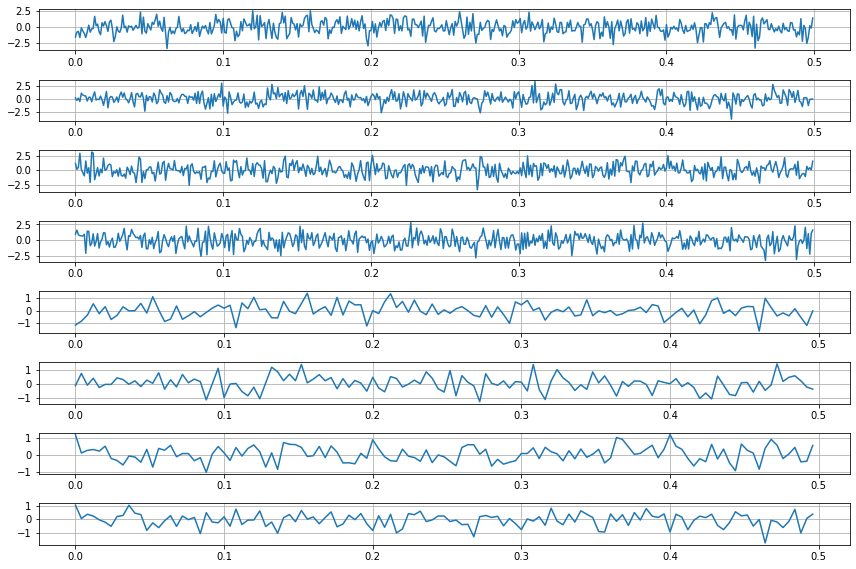

In [4]:
x_numpy = x.numpy()
y_avepool_numpy = y_avepool.detach().numpy()
scale_x = np.arange(x_numpy.shape[-1]) / srate
scale_y = np.arange(y_avepool_numpy.shape[-1]) / (srate / ds_coef)

fig, ax = plt.subplots(n_channels*2, 1, figsize=(12, 1*n_channels*2))

for i in range(n_channels):
    ax[i].plot(scale_x, x_numpy[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title('')
    ax[i].grid(True)

for i in range(n_channels):
    ax[i+n_channels].plot(scale_y, y_avepool_numpy[i])
    ax[i+n_channels].set_xlabel('')
    ax[i+n_channels].set_ylabel('')
    ax[i+n_channels].set_title('')
    ax[i+n_channels].grid(True)
    
plt.tight_layout()
plt.show()

# ResampleLayer

In [5]:
torch.manual_seed(1)

srate = 1000
n_channels = 4
ds_coef = 4
x = torch.randn(size=(n_channels, 500,))

resample = ResampleLayer(ds_coef)
y_resample = resample(x)
print(x.shape, y_resample.shape)

torch.Size([4, 500]) torch.Size([4, 125])


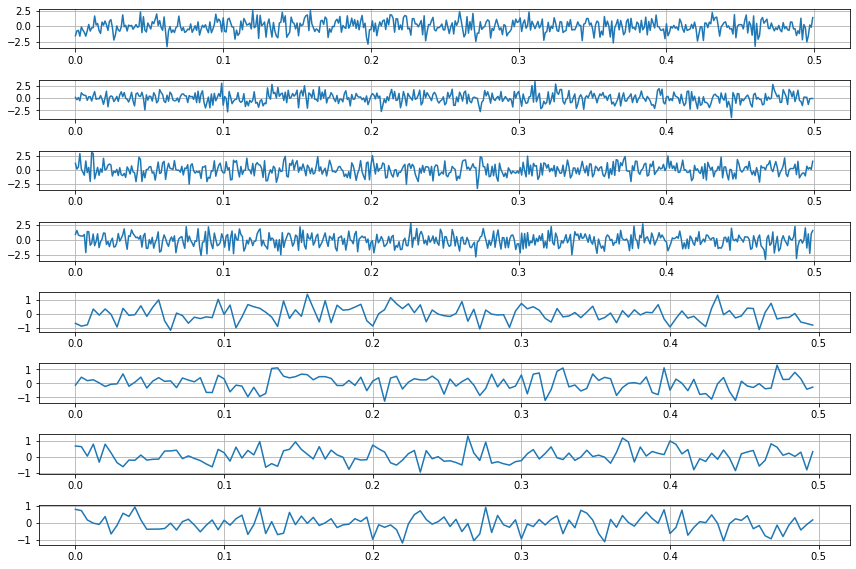

In [6]:
x_numpy = x.numpy()
y_resample_numpy = y_resample.detach().numpy()
scale_x = np.arange(x_numpy.shape[-1]) / srate
scale_y = np.arange(y_resample_numpy.shape[-1]) / (srate / ds_coef)

fig, ax = plt.subplots(n_channels*2, 1, figsize=(12, 1*n_channels*2))

for i in range(n_channels):
    ax[i].plot(scale_x, x_numpy[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title('')
    ax[i].grid(True)

for i in range(n_channels):
    ax[i+n_channels].plot(scale_y, y_resample_numpy[i])
    ax[i+n_channels].set_xlabel('')
    ax[i+n_channels].set_ylabel('')
    ax[i+n_channels].set_title('')
    ax[i+n_channels].grid(True)
    
plt.tight_layout()
plt.show()

# Comparison

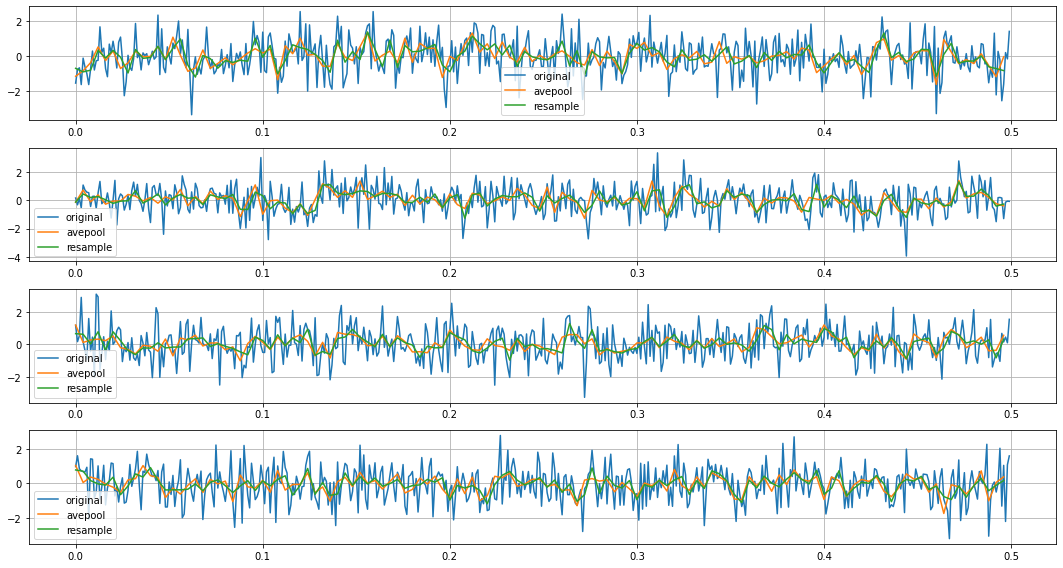

In [7]:
fig, ax = plt.subplots(n_channels, 1, figsize=(15, 2*n_channels))

for i in range(n_channels):
    ax[i].plot(scale_x, x_numpy[i], label='original')
    ax[i].plot(scale_y, y_avepool_numpy[i], label='avepool')
    ax[i].plot(scale_y, y_resample_numpy[i], label='resample')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title('')
    ax[i].legend()
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()